# PyTorch Custom Datasets 
### What will this notebook cover?
- Learn about custom dataset
- Transforming data
- Loading data with `ImageFolder` (comes with `torchvison.datasets`)
- Different forms of data transformations
- Replicate the functionality of torchvison's `ImageFolder` 

## What is a custom dataset? 
A custom dataset in PyTorch is a way to create your own dataset for training a machine learning model, especially when the data you want to use isn't in a standard format that PyTorch's built-in datasets support.

## Why Use a Custom Dataset?
PyTorch has built-in datasets like MNIST and CIFAR-10, but if your data is in a different format (like images stored in folders or paired with labels in a CSV file), you need a custom dataset to handle it.

<hr style="height: 2px; background-color: White; border: none; width: 100%;">


In [67]:
# importing necessary libraries

import os
import requests
import zipfile
import pathlib
from pathlib import Path
import random
from typing import Tuple, Dict, List

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import Dataset



# 1. Loading the data 

In [2]:
import requests 
import zipfile
from pathlib import Path

In [3]:
# path to load the data
data_path   = Path("root/")
image_path  = data_path / "steak_sushi_pizza"

#Create the directory
if image_path.is_dir():
    print(f'{image_path} already exists.')
else:
    print("Creating directory ...")
    image_path.mkdir(parents=True, exist_ok=True)
    print(f"'{image_path}' created sucessfully")

#download data into the directory
with open(data_path/"pizza_steak_sushi.zip", "wb") as f: #note: wb mode will create file if it doesnot exist in initial
    request =  requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(" Downloading the data ...")
    f.write(request.content) 
    
# Unzip the file
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_f:
    print(" Unzipping....")
    zip_f.extractall(image_path)

Creating directory ...
'root/steak_sushi_pizza' created sucessfully
 Unzipping....


In [4]:
# Visualize the stricture of the directory

def print_directory_tree(path, indent=""):
    """
        Print a tree-like structure of the directory contents.

        This function recursively traverses the directory specified by the `path` 
        argument and prints its structure in a visually appealing format. 
        Only directories are shown; files are omitted.

        Parameters:
        path (str): The path to the directory to be printed.
        indent (str): The string used for indentation to create the tree structure. 
                      It is used internally during recursion and should not be 
                      modified when calling the function.
        result (str): A string to accumulate the directory structure for testing.

        Returns:
        str: A formatted string representing the directory structure.
     """
    # List all items in the given directory
    items = os.listdir(path)
    # Sort the items for a more organized output
    items.sort()
    
    for index, item in enumerate(items):
        # Create the full path
        full_path = os.path.join(path, item)
        
        # Check if the item is a directory
        if os.path.isdir(full_path):
            # Print the directory name
            print(f"{indent}├── {item}/")
            # Recursively print the contents of the directory
            print_directory_tree(full_path, indent + "│   ")

# Usage
directory_path = "/kaggle/working/"  
print_directory_tree(directory_path)


├── .virtual_documents/
├── root/
│   ├── steak_sushi_pizza/
│   │   ├── test/
│   │   │   ├── pizza/
│   │   │   ├── steak/
│   │   │   ├── sushi/
│   │   ├── train/
│   │   │   ├── pizza/
│   │   │   ├── steak/
│   │   │   ├── sushi/


In [5]:
def walk_through_dir(path):
    """
      Walks through dir_path returning its contents.
      Args:
        dir_path (str or pathlib.Path): target directory

      Returns:
        A print out of:
          number of subdiretories in dir_path
          number of images (files) in each subdirectory
          name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(path):
         print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
        


In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'root/steak_sushi_pizza'.
There are 3 directories and 0 images in 'root/steak_sushi_pizza/test'.
There are 0 directories and 19 images in 'root/steak_sushi_pizza/test/steak'.
There are 0 directories and 25 images in 'root/steak_sushi_pizza/test/pizza'.
There are 0 directories and 31 images in 'root/steak_sushi_pizza/test/sushi'.
There are 3 directories and 0 images in 'root/steak_sushi_pizza/train'.
There are 0 directories and 75 images in 'root/steak_sushi_pizza/train/steak'.
There are 0 directories and 78 images in 'root/steak_sushi_pizza/train/pizza'.
There are 0 directories and 72 images in 'root/steak_sushi_pizza/train/sushi'.


In [7]:
# setting up the train and test data path

train_path = image_path/"train"
test_path  = image_path/"test"

train_path, test_path

(PosixPath('root/steak_sushi_pizza/train'),
 PosixPath('root/steak_sushi_pizza/test'))

### Visualize image from the path 

Random image path: root/steak_sushi_pizza/train/steak/1787505.jpg
Image class: steak
Image height: 512
Image width: 512


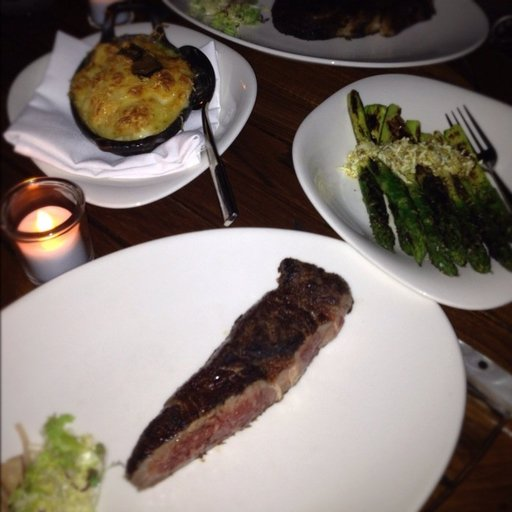

In [8]:
import random
from PIL import Image

#set seed if needed
#random.seed(44)

# get all image paths
all_image_path = list(image_path.glob("*/*/*.jpg")) #glob is used for pattern matching

# random image 
rand_img_path = random.choice(all_image_path)  #chose any random value from all_image_path list 

# Get random image class
image_class = rand_img_path.parent.stem 

#Open image
img = Image.open(rand_img_path)

print(f"Random image path: {rand_img_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [9]:
path = Path("/images/folder1/image.jpg")
print("",path ,"\n")
print(f"'path.parent' returns the directory containing the file or directory represented by the path : {path.parent} \n")
print(f"'path.stem' returns the final component of the path without the file extension : {path.stem}\n")
print(f"path.parent.stem : {path.parent.stem}")

 /images/folder1/image.jpg 

'path.parent' returns the directory containing the file or directory represented by the path : /images/folder1 

'path.stem' returns the final component of the path without the file extension : image

path.parent.stem : folder1


<hr>

# 2. Transforming data
Prerequisites for Loading Image Data into PyTorch includes:<br>
   1. Turn it into tensors.
   2. Turn it into `torch.utils.data.Dataset` and subsequently inot a `torch.utils.data.DataLoader`

#### Some widely used pre-built datasets and dataset loaders for PyTorch

<table align='left' >
    <thead>
        <tr>
            <th>Problem Space</th>
            <th>Pre-built Datasets and Functions</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Vision</td>
            <td><code>torchvision.datasets</code></td>
        </tr>
        <tr>
            <td>Audio</td>
            <td><code>torchaudio.datasets</code></td>
        </tr>
        <tr>
            <td>Text</td>
            <td><code>torchtext.datasets</code></td>
        </tr>
        <tr>
            <td>Recommendation System</td>
            <td><code>torchrec.datasets</code></td>
        </tr>
    </tbody>
</table>

## 2.1 Turning data into tensor [Also data transformation] 
With the help of `torchvision.tranforms` we can convert our image data into the tensors. <br>
Some widely used transforms are:<br>
<table align='left'>
    <thead>
        <tr>
            <th>Transform</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><code>ToTensor</code></td>
            <td>Converts a PIL Image or NumPy array to a PyTorch tensor.</td>
        </tr>
        <tr>
            <td><code>Normalize</code></td>
            <td>Normalizes a tensor image with mean and standard deviation.</td>
        </tr>
        <tr>
            <td><code>Resize</code></td>
            <td>Resizes the input image to a specified size.</td>
        </tr>
        <tr>
            <td><code>CenterCrop</code></td>
            <td>Crops the given image at the center.</td>
        </tr>
        <tr>
            <td><code>RandomCrop</code></td>
            <td>Crops the image at a random location.</td>
        </tr>
        <tr>
            <td><code>RandomHorizontalFlip</code></td>
            <td>Flips the image horizontally with a given probability.</td>
        </tr>
        <tr>
            <td><code>RandomVerticalFlip</code></td>
            <td>Flips the image vertically with a given probability.</td>
        </tr>
        <tr>
            <td><code>Rotation</code></td>
            <td>Rotates the image by a specified angle.</td>
        </tr>
        <tr>
            <td><code>Affine</code></td>
            <td>Applies an affine transformation to the image (translation, scaling, rotation).</td>
        </tr>
        <tr>
            <td><code>ColorJitter</code></td>
            <td>Randomly changes the brightness, contrast, saturation, and hue of the image.</td>
        </tr>
    </tbody>
</table>
 


In [10]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.RandomHorizontalFlip(p=0.51), # p = probabilty of flip
    transforms.ToTensor()  
])

### Visualizing the difference in image before and after transformation

In [11]:
def plot_before_after(image_paths, transforms, n=3):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
    """
    #set seed if needed
    #random.seed(11)
    
    rand_img_path = random.sample(image_paths, k=n)
    print(type(rand_img_path))
    for image_path in rand_img_path:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1,2)
            #plot orginal image
            ax[0].imshow(f)
            ax[0].set_title(f"original \nSize: {f.size}")
            ax[0].axis(False)
            
            #plot image after transforms
            transformed_image = transforms(f).permute(1, 2, 0) # changing from [C,H,W] to [H,W,C]
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
    

<class 'list'>


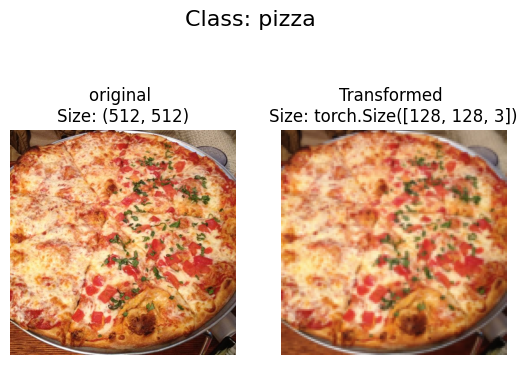

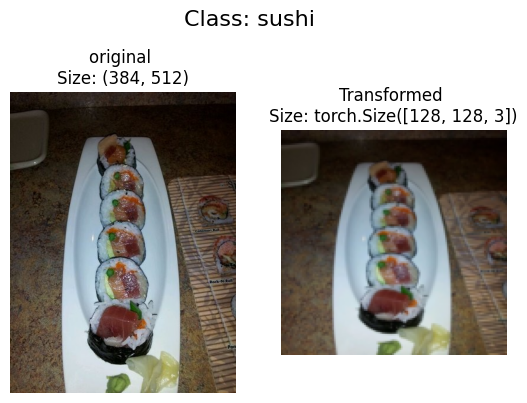

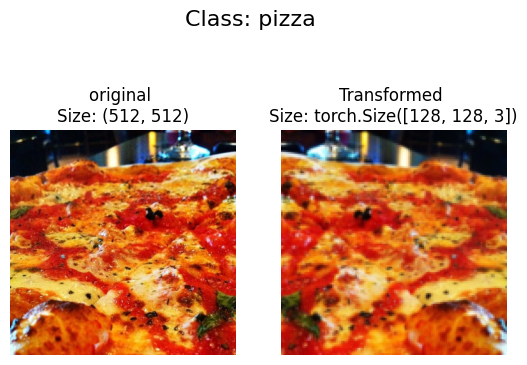

In [12]:
plot_before_after(all_image_path, 
                        transforms=data_transform, 
                        n=3)

fig:
* This variable is a reference to the Figure object created by plt.subplots().
* The Figure is the top-level container for all the plot elements. It can contain one or more Axes (subplots), titles, legends, and other elements.
* we can use fig to manipulate the overall properties of the figure, such as setting the size, adding titles, or saving the figure to a file.

ax:

* This variable is a reference to an array of Axes objects.
In this case, since we specified 1 row and 2 columns, ax will be a 1-dimensional array (or list) containing two Axes objects.
* Each Axes object represents a single subplot where we can plot our data. we can access them using indexing, like ax[0] for the first subplot and ax[1] for the second.
* we can use ax to plot data on the respective subplots, customize labels, titles, and other visual properties specific to each subplot.
<hr width='100%'>


# 3. Turing our data into Dataset using `ImageFolder`
Since our data is in standard image classification format, we can use the class torchvision.datasets.ImageFolder.

Where we can pass it the file path of a target image directory as well as a series of transforms we'd like to perform on our images.

In [15]:
train_data = datasets.ImageFolder(root = train_path,
                                  transform = data_transform,
                                  target_transform = None
                                  )
test_data = datasets.ImageFolder(root= test_path,
                                 transform = data_transform,
                                  )

In [17]:
test_data, train_data

(Dataset ImageFolder
     Number of datapoints: 75
     Root location: root/steak_sushi_pizza/test
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.51)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 225
     Root location: root/steak_sushi_pizza/train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.51)
                ToTensor()
            ))

In [18]:
# Getting class names as a list
class_names = train_data.classes

class_names

['pizza', 'steak', 'sushi']

In [20]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [30]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1137, 0.1137, 0.1059,  ..., 0.1098, 0.1098, 0.1137],
         [0.1137, 0.1098, 0.1059,  ..., 0.1216, 0.1216, 0.1255],
         [0.1098, 0.1059, 0.1020,  ..., 0.1294, 0.1294, 0.1333],
         ...,
         [0.0824, 0.0863, 0.0902,  ..., 0.1647, 0.1686, 0.1765],
         [0.0902, 0.0863, 0.0824,  ..., 0.1647, 0.1686, 0.1765],
         [0.0863, 0.0824, 0.0824,  ..., 0.1569, 0.1569, 0.1608]],

        [[0.0706, 0.0745, 0.0706,  ..., 0.0549, 0.0549, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0745, 0.0745, 0.0745,  ..., 0.0627, 0.0627, 0.0667],
         ...,
         [0.1059, 0.1098, 0.1098,  ..., 0.2275, 0.2275, 0.2314],
         [0.1059, 0.1020, 0.1020,  ..., 0.2275, 0.2314, 0.2314],
         [0.1020, 0.0980, 0.0980,  ..., 0.2353, 0.2275, 0.2275]],

        [[0.0941, 0.0980, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0941, 0.0941, 0.0902,  ..., 0.0235, 0.0235, 0.0235],
         [0.0941, 0.0941, 0.0902,  ..., 0.01

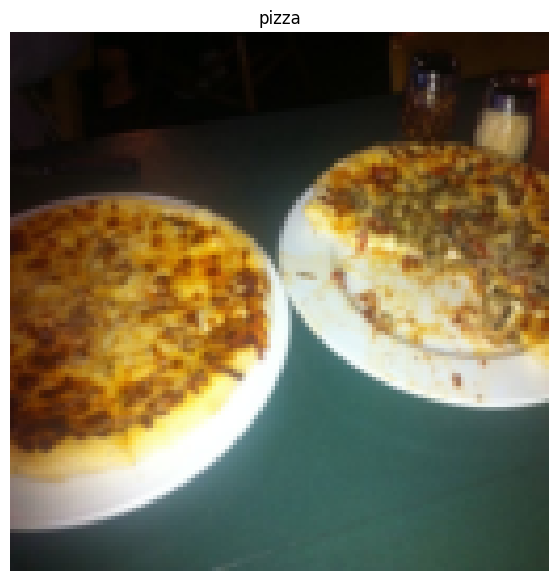

In [37]:
# plotting above data

plt.figure(figsize=(9,7))
plt.imshow(img.permute(1,2,0))
plt.axis(False)
plt.title(class_names[label])
plt.show()

## 3.1 Turn loaded dataset into DataLoader

In [42]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=2,   #how mnay samples per batch?
                              num_workers=os.cpu_count(),  # how many subprocesses to use for data loading
                              shuffle=True)   # shuffle for more randomness
test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=1, 
                             shuffle=False)

In [43]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([2, 3, 128, 128]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([2])


<hr>

# 4. Replication of ImageFolder  

In [52]:
# creating function to get class names
from typing import Tuple, Dict, List

class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Class names found: ['pizza', 'steak', 'sushi']


In [56]:
def find_classes(directory : str )-> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    
    classes= sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    #raise error if class name not found
    if not classes:
        raise FileNotFoundError(f" No classes were found in {directory}!")
    
    class_to_idx = {name:i  for i, name in enumerate(classes)}
    
    return classes, class_to_idx
    

In [57]:
find_classes(train_path) 

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Before creating custom dataset class
1. Subclass `torch.utils.data.Dataset.`
2. Initialize our subclass with a `targ_dir` parameter (the target data directory) and transform parameter (so we have the option to transform our data if needed).
3. Create several attributes for paths (the paths of our target images), transform (the transforms we might like to use, this can be None), classes and `class_to_idx` (from our find_classes() function).
4. Create a function to load images from file and return them, this could be using PIL or `torchvision.io` (for input/output of vision data).
5. Overwrite the `__len__` method of `torch.utils.data.Dataset` to return the number of samples in the Dataset, this is recommended but not required. This is so you can call len(Dataset).
6. Overwrite the `__getitem__` method of `torch.utils.data.Dataset` to return a single sample from the Dataset, this is required.

In [84]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, target_dir, transform=None)->None:
        #get all image path
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
        
        #transforms
        self.transform = transform
        
        #create classes and class to index
        
        self.classes, self.class_to_idx = find_classes(target_dir)
        
    def load_image(self, index:int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self,index:int)-> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name = self.paths[index].parent.stem
        class_idx = self.class_to_idx[class_name]
        
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)
            
        

In [68]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [86]:
train_data_custom = CustomDataset(target_dir=train_path, 
                                  transform=train_transforms)
test_data_custom = CustomDataset(target_dir=test_path, 
                                    transform=test_transforms)


In [87]:
train_data_custom[0]

(tensor([[[0.9804, 0.9725, 0.9765,  ..., 0.9922, 0.9843, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9882, 0.9922, 0.9882],
          [0.9765, 0.9765, 0.9804,  ..., 0.9765, 0.9765, 0.9765],
          ...,
          [0.9647, 0.9647, 0.9529,  ..., 0.9725, 0.9725, 0.9686],
          [0.9686, 0.9686, 0.9569,  ..., 0.9725, 0.9725, 0.9686],
          [0.9765, 0.9725, 0.9608,  ..., 0.9725, 0.9765, 0.9725]],
 
         [[0.9451, 0.9373, 0.9412,  ..., 0.9922, 0.9725, 0.9529],
          [0.9294, 0.9294, 0.9294,  ..., 0.9961, 0.9882, 0.9686],
          [0.9176, 0.9216, 0.9216,  ..., 0.9608, 0.9412, 0.9137],
          ...,
          [0.8667, 0.8588, 0.8353,  ..., 0.8667, 0.8667, 0.8627],
          [0.8745, 0.8706, 0.8510,  ..., 0.8745, 0.8667, 0.8667],
          [0.8824, 0.8784, 0.8588,  ..., 0.8706, 0.8706, 0.8667]],
 
         [[0.8667, 0.8549, 0.8471,  ..., 0.9412, 0.8353, 0.7765],
          [0.8078, 0.8118, 0.8118,  ..., 0.9569, 0.8824, 0.8157],
          [0.7725, 0.7725, 0.7686,  ...,

In [88]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

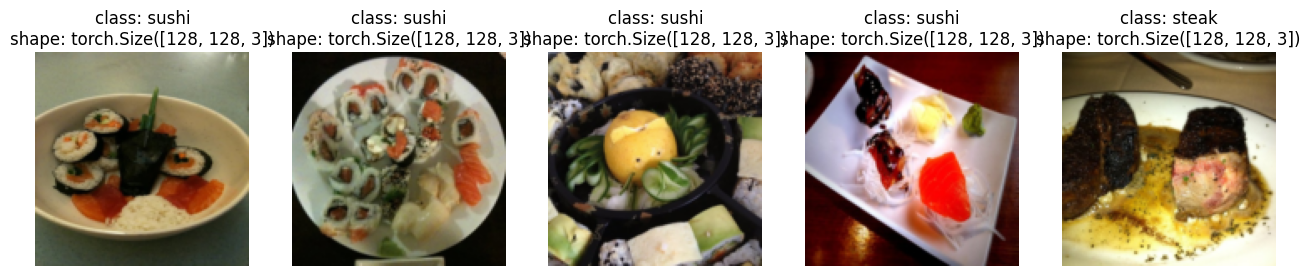

In [89]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=5, 
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


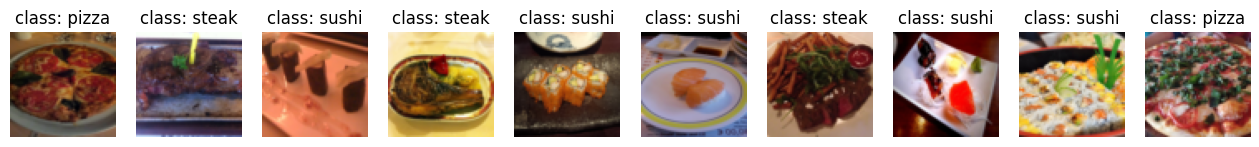

In [90]:
# Display random images from custom Dataset
display_random_images(train_data_custom, 
                      n=12, 
                      classes=class_names,
                      seed=None) # Try setting the seed for reproducible images

In [91]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7ed0c06f1720>,
 <torch.utils.data.dataloader.DataLoader at 0x7ed0c07412d0>)

In [92]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7ed0c07428f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ed0c07410c0>)